<p style="font-size:15pt; text-align:center">
    Introduction to Data Science
</p>
<p style="font-size:20pt; text-align:center">
    Data Modeling
</p>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx

%matplotlib inline

# Modeling Basics

## Losses

In [7]:
def l2_loss(y, yhat):
    return (y - yhat)**2

def l1_loss(y, yhat):
    return np.abs(y - yhat)

## Toy Data

In [4]:
toy = np.array([20, 21, 22, 29, 33])
single_obs = toy[0]

Let's plot the $L_2$ loss for a **single** observation. We'll plot the $L_2$ loss for the first observation; since $y_1 = 20$, we'll be plotting

$$L_2(20, \theta) = (20 - \theta)^2$$

In [5]:
thetas = np.linspace(10, 30, 1000)
l2_loss_single_obvs = l2_loss(single_obs, thetas)

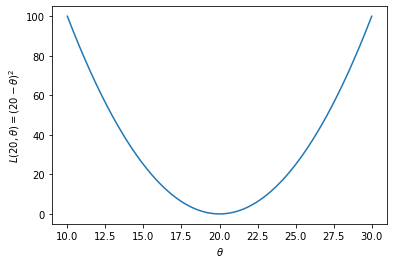

In [6]:
plt.plot(thetas, l2_loss_single_obvs);
plt.xlabel(r'$\theta$');
plt.ylabel(r'$L(20, \theta) = (20 - \theta)^2$');
#plt.savefig('l2_single_obvs.png', bbox_inches = 'tight');

We can see that the loss for a single observation is minimized by that observation itself (i.e. when $\theta = 20$, the above loss is minimized).

Let's now compute the average loss over all of our toy data.

In [8]:
def avg_loss(loss, est, data):
    return np.mean(np.array([loss(est, y_obs) for y_obs in data]), axis=0)

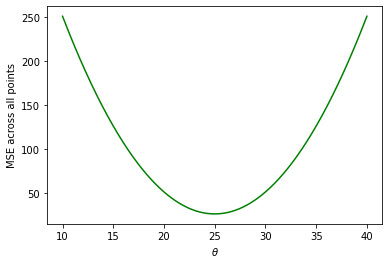

In [9]:
thetas = np.linspace(10, 40, 1000)
l2_loss_thetas = avg_loss(l2_loss, thetas, toy)

plt.plot(thetas, l2_loss_thetas, color = 'green');
plt.xlabel(r'$\theta$');
plt.ylabel(r'MSE across all points');

The explicit expression for the MSE here is

$$R(\theta) = \frac{1}{5} \big((20 - \theta)^2 + (21 - \theta)^2 + (22 - \theta)^2 + (29 - \theta)^2 + (33 - \theta)^2\big)$$

Note; the shape looks similar, but the minimizing value of $\theta$ is now shifted. It appears to be closer to 25 (which you may notice as the mean of [20, 21, 22, 29, 33]).

Let's now do the same, but for L1 loss. For our first observation, the $L_1$ loss is

$$L_1(20, \theta) = |20 - \theta|$$

In [10]:
thetas = np.linspace(10, 30, 1000)
l1_loss_single_obvs = l1_loss(single_obs, thetas)

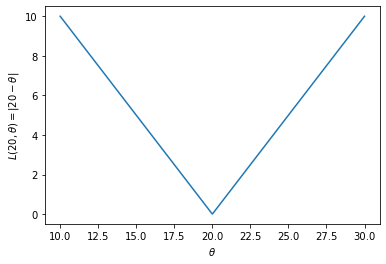

In [11]:
plt.plot(thetas, l1_loss_single_obvs);
plt.xlabel(r'$\theta$');
plt.ylabel(r'$L(20, \theta) = |20 - \theta|$');
#plt.savefig('l1_single_obvs.png', bbox_inches = 'tight');

Again this is centered on the observation itself, 20.

Averaging across all of our data:

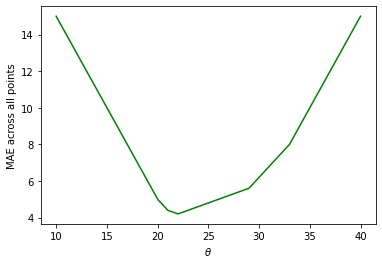

In [12]:
thetas = np.linspace(10, 40, 1000)
l1_loss_thetas = avg_loss(l1_loss, thetas, toy)

plt.plot(thetas, l1_loss_thetas, color = 'green');
plt.xlabel(r'$\theta$');
plt.ylabel(r'MAE across all points');

The explicit expression for the MAE here is

$$R(\theta) = \frac{1}{5} \big(|20 - \theta| + |21 - \theta| + |22 - \theta| + |29 - \theta| + |33 - \theta|\big)$$

Note, it is pointy, and not smooth like the MSE. It also doesn't exactly look like a simple absolute value curve. It's a combination of several absolute value functions.

The minimizing value of the MAE here is $\theta = 22$, as that is the median of our observations.

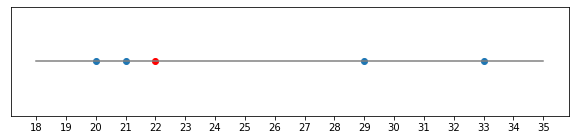

In [13]:
plt.figure(figsize = (10, 2))
plt.plot([18, 35], [5, 5], color = 'grey')
plt.scatter([20, 21, 29, 33], [5, 5, 5, 5])
plt.scatter([22], [5], color = 'red')

plt.ylim(4.5, 5.5)
plt.xticks(np.arange(18, 36, 1))
plt.yticks([]);

What if we instead had an even number of points. There wouldn't be a unique median! Let's see what happens:

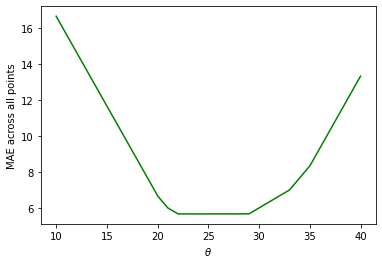

In [14]:
toy2 = np.array([20, 21, 22, 29, 33, 35])
thetas = np.linspace(10, 40, 1000)
l1_loss_thetas = avg_loss(l1_loss, thetas, toy2)

plt.plot(thetas, l1_loss_thetas, color = 'green');
plt.xlabel(r'$\theta$');
plt.ylabel(r'MAE across all points');

# Simple Linear Regression

In [15]:
def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))

Let's read in our data.

In [16]:
df = pd.read_csv('./data/galton.csv').iloc[:, 1:]
df.head()

,parent,child
0,70.5,61.7
1,68.5,61.7
2,65.5,61.7
3,64.5,61.7
4,64.0,61.7


An interesting issue is that both our `parent` and `child` columns occur at fixed positions. We need to add some random noise, otherwise we'll suffer from gross overplotting.

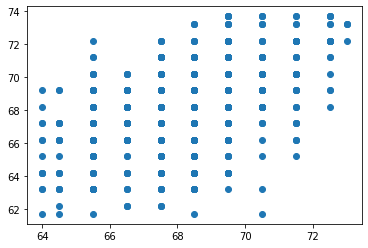

In [17]:
plt.scatter(df['parent'],df['child'])

In [18]:
df['parent'] = df['parent'] + np.random.randn(len(df))/2
df['child'] = df['child'] + np.random.randn(len(df))/2

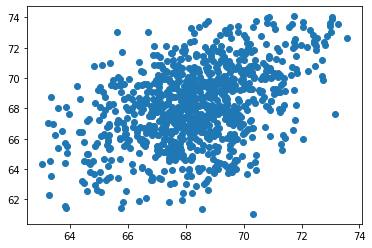

In [19]:
plt.scatter(df['parent'],df['child'])

Using our `correlation` function:

In [20]:
correlation(df['parent'], df['child'])

0.43522300927762697

Using an in-built `correlation` function:

In [21]:
np.corrcoef(df['parent'], df['child'])    

array([[1.        , 0.43522301],
       [0.43522301, 1.        ]])

In [22]:
df.corr()

,parent,child
parent,1.000000,0.435223
child,0.435223,1.000000



What we now want to do is compute the **average $y$ for a given $x$**. A practical way to do this is to "bin" our x axis into 1-unit wide buckets, and then compute the average $y$ value for everything in that bucket.

In [ ]:
def predict_mean_y(x):
    return df.loc[np.abs(df['parent'] - x) <= 0.5, 'child'].mean()

In [ ]:
df.head()

In [ ]:
df['child_predicted'] = df['parent'].apply(predict_mean_y)
df.head()

Now, let's look at our predictions:

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,6))# 
sns.scatterplot(data=df, x = 'parent', y = 'child', color="blue", label="actual", ax=ax)
sns.scatterplot(data=df, x = 'parent', y = 'child_predicted', color='red', 
                label = 'predicted means', ax=ax)
ax.set_xlabel('MidParent Height')
ax.set_ylabel('Child Height')

In [ ]:
#sns.regplot()

Save for the tails where there are fewer values to draw from, it seems like our red predictions roughly follow a straight line piercing through the "middle" of our point cloud. That's our motivation for using a line to model this bivariate data.

Now, it's time to implement the optimal coefficients.

In [ ]:
def slope(x, y):
    return correlation(x, y) * np.std(y) / np.std(x)

def intercept(x, y):
    return np.mean(y) - slope(x, y)*np.mean(x)

In [ ]:
ahat = intercept(df['parent'], df['child'])
bhat = slope(df['parent'], df['child'])

print("predicted y = {0:.2f} + {1:.2f} * average parent's height".format(ahat, bhat))

In [ ]:
# add predicted y in to df
df.loc[:,"predicted_parent"] = ahat + bhat*df['parent']
df.head()

Let's see what our linear model looks like.

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,6))# 
sns.scatterplot(data=df, x = 'parent', y = 'child', color="blue", label="actual", ax=ax)
sns.scatterplot(data=df, x = 'parent', y = 'child_predicted', color='gold', 
                label = 'predicted means', ax=ax)

sns.lineplot(data=df, x="parent", y= "predicted_parent", color="r", label="linear model", ax=ax)

ax.set_xlabel('MidParent Height')
ax.set_ylabel('Child Height')

# fit an arbitrary curve

In [ ]:
from scipy import optimize

In [ ]:
help(optimize)

## Exponential curve

In [ ]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.1 * rng.normal(size=xdata.size)
ydata = y + y_noise


plt.plot(xdata, ydata, 'bo', label='data')

popt, pcov = optimize.curve_fit(func, xdata, ydata)

print(popt)

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))


plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## Piecewise linear

In [ ]:
def make_fake_data(x0, y0, k1, k2):
    x = np.arange(1, 10, 0.1)
    #print(x0, y0, k1, k2, x)
    y = np.where(x<x0, y0+k1*(x-x0), y0+k2*(x-x0))
    # make noise
    x = x + np.random.randn(len(x))/8
    y = y + np.random.randn(len(y))/8
    return x, y

real_para = [6, 5, -0.3, 2]
x, y = make_fake_data(*real_para)



# model
def piecewise_linear(x, x0, y0, k1, k2):
    return np.where(x<x0, y0+k1*(x-x0), y0+k2*(x-x0))


p, e = optimize.curve_fit(piecewise_linear, x, y, p0=[4,6,-1,3])

print (p,)
x_fit = np.arange(1, 10, 0.1)
y_fit = piecewise_linear(x_fit, *p)


figure = plt.figure(figsize=(8., 8.))

plt.plot(x, y, 'o', ms=8, markeredgecolor='none',  
         label = 'data: x0={0:.2f}, y0={1:.2f}, k1={2:.2f}, k2={3:.2f}'.format(*real_para))
plt.plot(x_fit, y_fit, '-', linewidth = 3, markeredgecolor='none', 
         label = 'fit:x0={0:.2f}, y0={1:.2f}, k1={2:.2f}, k2={3:.2f}'.format(*p) )
plt.ylabel('Y')
plt.xlabel('X')
plt.legend();


# Data Modeling

## Load data

In [ ]:
math_topic = pd.read_csv("./data/math_topic_net.txt", sep="\t")
math_topic.loc[:,"IsSameParent"] = math_topic.apply(lambda x: 1 if x["CitingTopicParent"]==x["CitedTopicParent"] else 0, axis=1)
math_topic = math_topic[["CitingTopic","CitedTopic","weight","IsSameParent"]]
math_topic = math_topic[math_topic.CitingTopic != math_topic.CitedTopic]
print(math_topic.shape)
math_topic.head()

## Exploration

In [ ]:
math_topic.groupby("IsSameParent").agg({"weight":"mean"})

## Network analysis

In [ ]:
def get_in_out_deg(tab):
    in_deg = tab.groupby("CitedTopic").weight.sum().rename("InDegree")
    out_deg = tab.groupby("CitingTopic").weight.sum().rename("OutDegree")
    return pd.concat([in_deg, out_deg], axis=1).fillna(0)

degree = get_in_out_deg(math_topic)
degree

we will merge table to get ``CitingTopic``'s out-degree, and ``CitedTopic``'s in-degree.

In [ ]:
math_topic = math_topic.merge(degree.loc[:,"OutDegree"], left_on="CitingTopic", right_index=True)
math_topic = math_topic.rename(columns={"OutDegree":"CitingOutDegree"})

math_topic = math_topic.merge(degree.loc[:,"InDegree"], left_on="CitedTopic", right_index=True)
math_topic = math_topic.rename(columns={"InDegree":"CitedInDegree"})

# take the log
math_topic.loc[:,"log_weight"] = np.log10(math_topic.loc[:,"weight"] +1 )
math_topic.loc[:,"log_CitingOutDegree"] = np.log10(math_topic.loc[:,"CitingOutDegree"] +1 )
math_topic.loc[:,"log_CitedInDegree"] = np.log10(math_topic.loc[:,"CitedInDegree"] +1 )

math_topic.head()

Relationship between ``CitingTopic``'s out-degree and weight:

In [ ]:
math_topic.corr()

In [ ]:
sns.displot(math_topic["log_weight"], kde=True)

In [ ]:
sns.regplot(data=math_topic, x="log_CitingOutDegree", y="log_weight",x_bins=30, x_estimator=np.mean, )

In [ ]:
sns.regplot(data=math_topic, x="log_CitedInDegree", y="log_weight",x_bins=30, x_estimator=np.mean, )

## Modeling 

$$C_{ij} = c'(d_i^{out})^\alpha(d_j^{in})^\beta f'(\delta_{ij})$$

$$f'(\delta_{ij} ) = \left\{
\begin{aligned}
s' &  & if\  i, j \ share \ the\  same\  parent \\
1 &  & otherwise 
\end{aligned}
\right.$$


***When take the logarithmic transformation:***

$$log (C_{ij}) = c+\alpha\ log (d_i^{out}) + \beta\ log(d_j^{in}) + f(\delta_{ij})$$

$$f(\delta_{ij} ) = \left\{
\begin{aligned}
s &  & if\  i, j \ share \ the\  same\  parent \\
0 &  & otherwise 
\end{aligned}
\right.$$


In [ ]:
def my_model(X, alpha, beta, s, c):
    """
    X is a n*3 array.
    X[:,0] is the array for d_i(out)
    X[:,1] is the array for d_i(in)
    x[0,2] is a 0-1 array for f(delta), 1 if i,j share the same parent
    """
    F = s*X[:,2]
    return c+((X[:,0])*alpha)+((X[:,1])*beta)+F

X = math_topic[["log_CitingOutDegree","log_CitedInDegree","IsSameParent"]].values
Y = math_topic["log_weight"].values


p, e = optimize.curve_fit(my_model, X, Y, p0=[0.4, 0.4, 0.2, 1])

print (p,)
y_fit = my_model(X, *p)

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y, y_fit)

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=Y, y=y_fit, s=2, color=".15")
sns.histplot(x=Y, y=y_fit, bins=50, pthresh=.1, cmap="mako")
#sns.kdeplot(x=Y, y=y_fit, levels=5, color="w", linewidths=1)
plt.ylim([-1,4])
plt.xlim([-1,4])
plt.xlabel("Real Weights")
plt.ylabel("predicted Weights")

### Solve with multiple linear regression

In [ ]:
import sklearn.linear_model as lm
model = lm.LinearRegression(fit_intercept = True)

model.fit(math_topic[["log_CitingOutDegree","log_CitedInDegree","IsSameParent"]], math_topic["log_weight"]);

print (model.coef_, model.intercept_)


# The End

**Source:**
This notebook was adapted from:
* Data 8: The Foundations of Data Science
* Data 100: Principles and Techniques of Data Science by Suraj Rampure,  Fernando Pérez, et. al.
* Introduction to Data Science and Visualization by James Bagrow
